In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import clean data
df = pd.read_csv('data_cleaned.csv')
df.head()

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths,Daily cases,Daily deaths,Season
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-25,8.0,0.0,0.0,0,0,Winter
1,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-26,5.0,0.0,0.0,0,0,Winter
2,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-27,4.0,0.0,0.0,0,0,Winter
3,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-28,1.0,0.0,0.0,0,0,Winter
4,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-29,8.0,0.0,0.0,0,0,Winter


Graph of Cases by Date

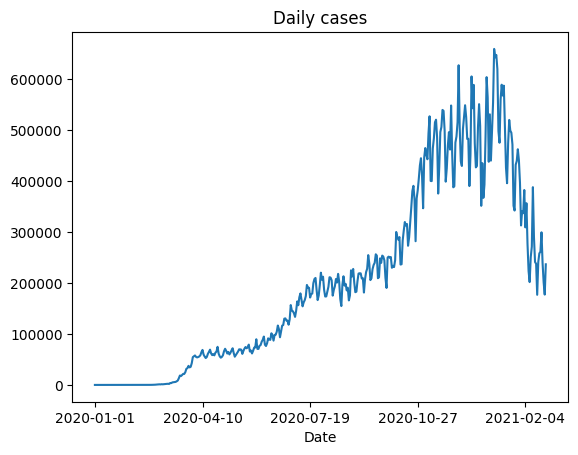

In [3]:
dfByDate = df.copy()
dfByDate.set_index('Date', inplace=True)

dfByDate = dfByDate.groupby(by=[dfByDate.index]).sum(numeric_only = True)

plt.plot(dfByDate.index[:-3], dfByDate['Daily cases'][:-3])
# Get the number of data points in the DataFrame
n_points = len(dfByDate.index)

# Create a list of every 100th data point index
tick_locs = range(0, n_points, 100)

# Create a list of the corresponding tick labels
tick_labels = dfByDate.index[tick_locs]

# Set the tick locations and labels on the x-axis
plt.xticks(tick_labels, tick_labels)

plt.title("Daily cases")
plt.xlabel("Date")

plt.show()

Graph of Deaths by Date

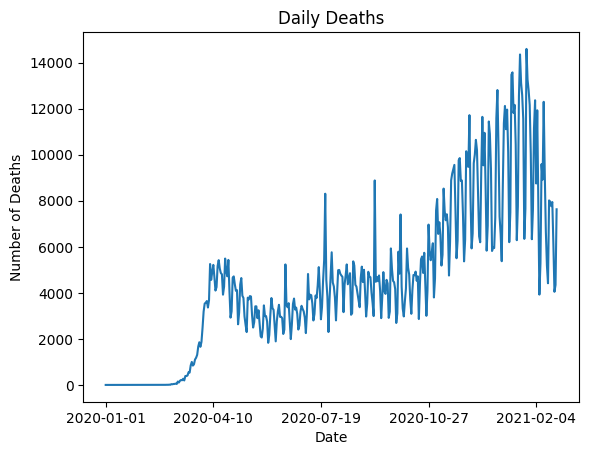

In [4]:
plt.plot(dfByDate.index[:-3], dfByDate['Daily deaths'][:-3])

# Get the number of data points in the DataFrame
n_points = len(dfByDate.index)

# Create a list of every 100th data point index
tick_locs = range(0, n_points, 100)

# Create a list of the corresponding tick labels
tick_labels = dfByDate.index[tick_locs]

# Set the tick locations and labels on the x-axis
plt.xticks(tick_labels, tick_labels)

plt.title('Daily Deaths')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.show()

Graph of Deaths by Season

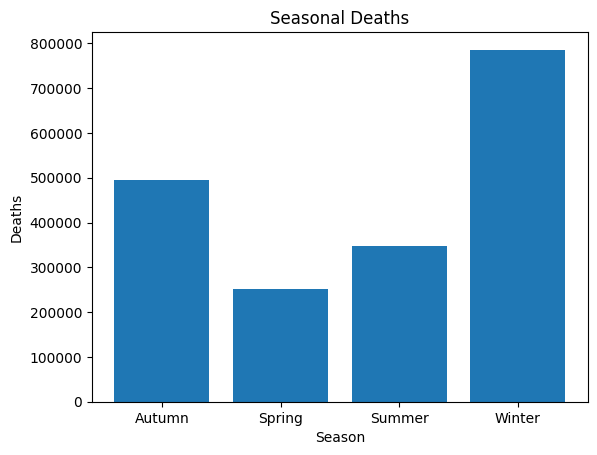

In [5]:
# keep only season and deaths_today
dfSeason = df[['Season', 'Daily deaths']]
# group by season and sum deaths
dfSeason = dfSeason.groupby(by=['Season']).sum(numeric_only = True)
# plot
plt.bar(dfSeason.index, dfSeason['Daily deaths'])
plt.xlabel('Season')
plt.ylabel('Deaths')
plt.title('Seasonal Deaths')
plt.show()


Graph of Mortality rate by Country

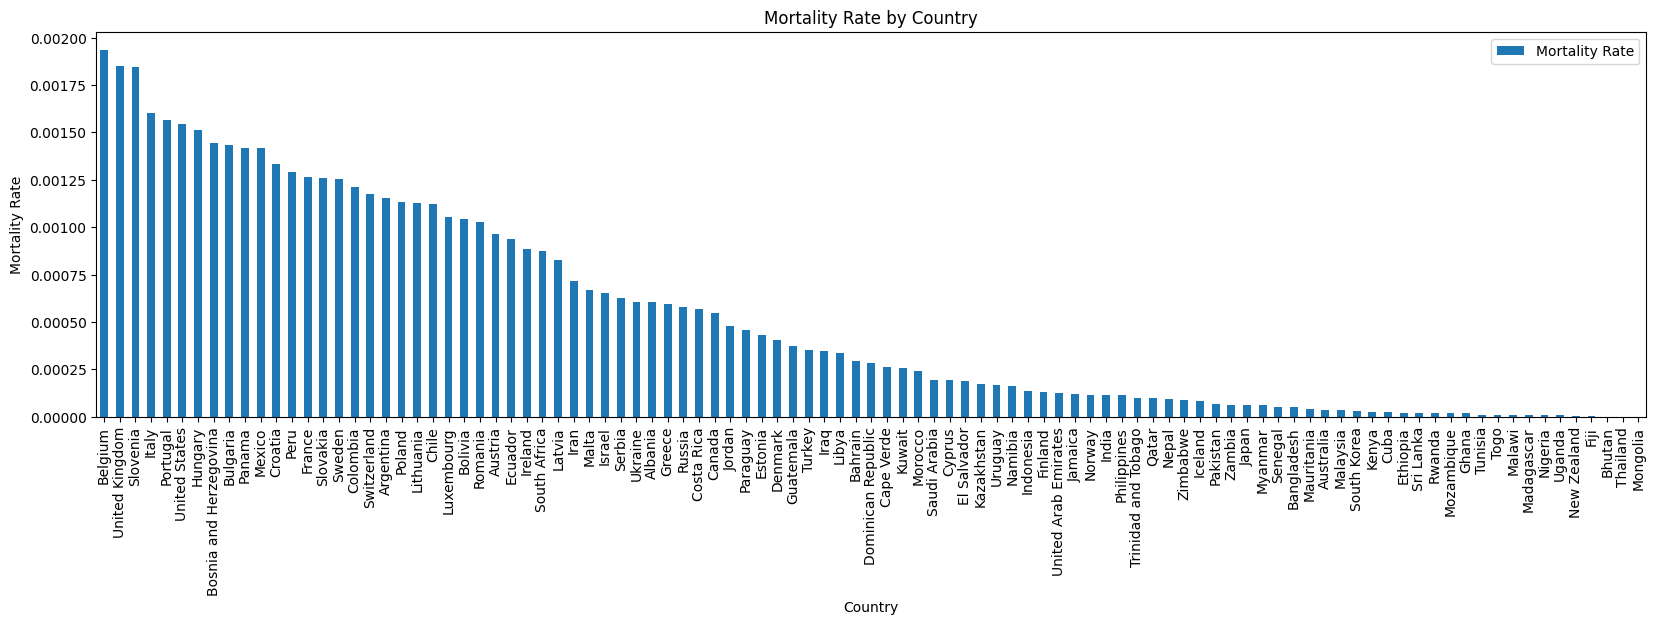

In [6]:
# Mortality rate is the number of deaths due to a disease divided by the total population.

# keep only the entity, the population, and the deaths
dfMortality = df[['Entity', 'Population', 'Deaths']]
# group by entity and get the max of deaths
dfMortality = dfMortality.groupby(by=['Entity']).max(numeric_only = True)
# calculate mortality rate
dfMortality['Mortality Rate'] = dfMortality['Deaths'] / dfMortality['Population']
# remove the population and deaths columns
dfMortality.drop(['Population', 'Deaths'], axis=1, inplace=True)
# sort by mortality rate
dfMortality.sort_values(by=['Mortality Rate'], ascending=False, inplace=True)

# plot the mortality rate
dfMortality.plot(kind='bar', figsize=(20, 5))
plt.xlabel('Country')
plt.ylabel('Mortality Rate')
plt.title('Mortality Rate by Country')
plt.show()

Graph Positivity rate by Country

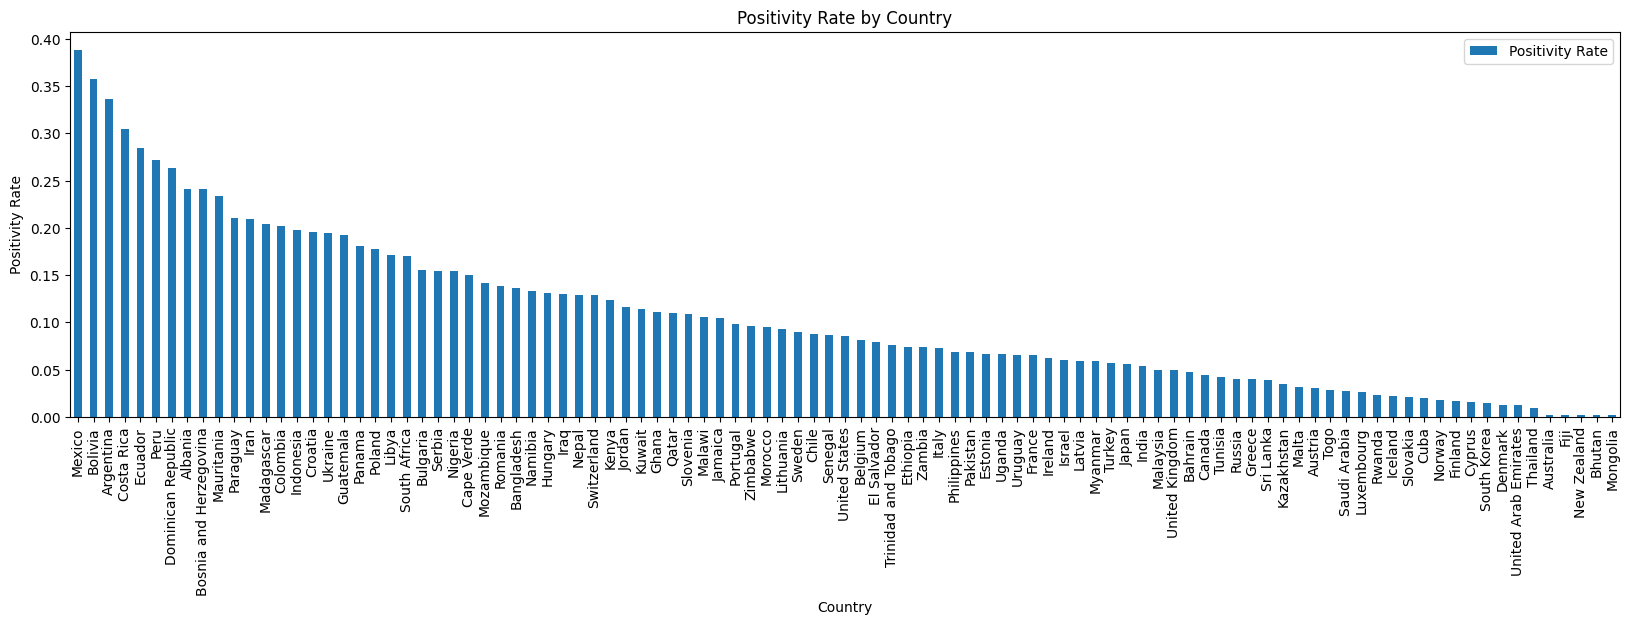

In [7]:
dfPositivity = df[['Entity', 'Daily tests', 'Daily cases']]
dfPositivity = dfPositivity.groupby(by=['Entity']).sum(numeric_only = True)
dfPositivity['Positivity Rate'] = dfPositivity['Daily cases'] / dfPositivity['Daily tests']

# remove the Daily tests, Daily cases columns
dfPositivity.drop(['Daily tests', 'Daily cases'], axis=1, inplace=True)

dfPositivity.sort_values(by=['Positivity Rate'], ascending=False, inplace=True)

dfPositivity.plot(kind='bar', figsize=(20, 5))
plt.xlabel('Country')
plt.ylabel('Positivity Rate')
plt.title('Positivity Rate by Country')
plt.show()

Graph of Death rate by Country

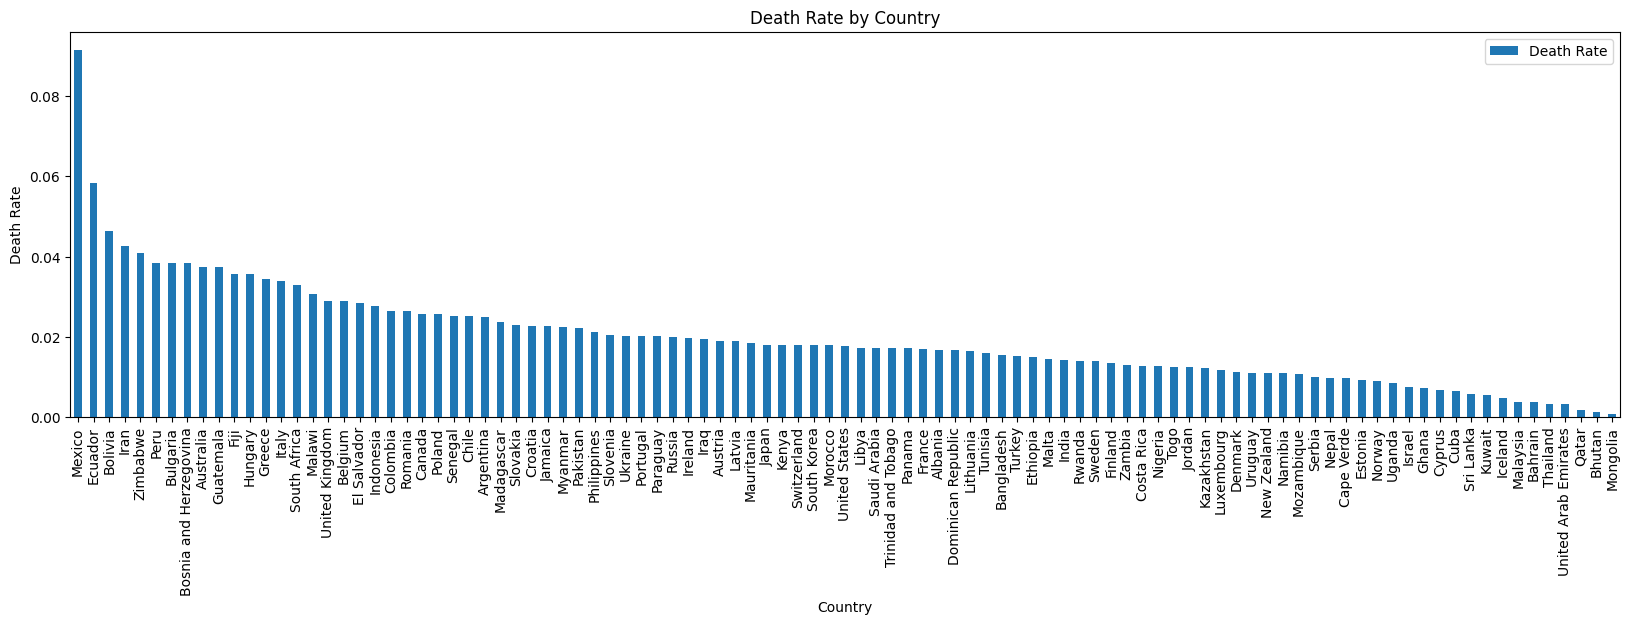

In [8]:
dfDeathRate = df[['Entity', 'Daily deaths', 'Daily cases']]
dfDeathRate = dfDeathRate.groupby(by=['Entity']).sum(numeric_only = True)
dfDeathRate['Death Rate'] = dfDeathRate['Daily deaths'] / dfDeathRate['Daily cases']

# remove the Daily deaths, Daily cases columns
dfDeathRate.drop(['Daily deaths', 'Daily cases'], axis=1, inplace=True)

dfDeathRate.sort_values(by=['Death Rate'], ascending=False, inplace=True)

dfDeathRate.plot(kind='bar', figsize=(20, 5))
plt.xlabel('Country')
plt.ylabel('Death Rate')
plt.title('Death Rate by Country')
plt.show()

Graph of Average temperature per years of each counry by cases

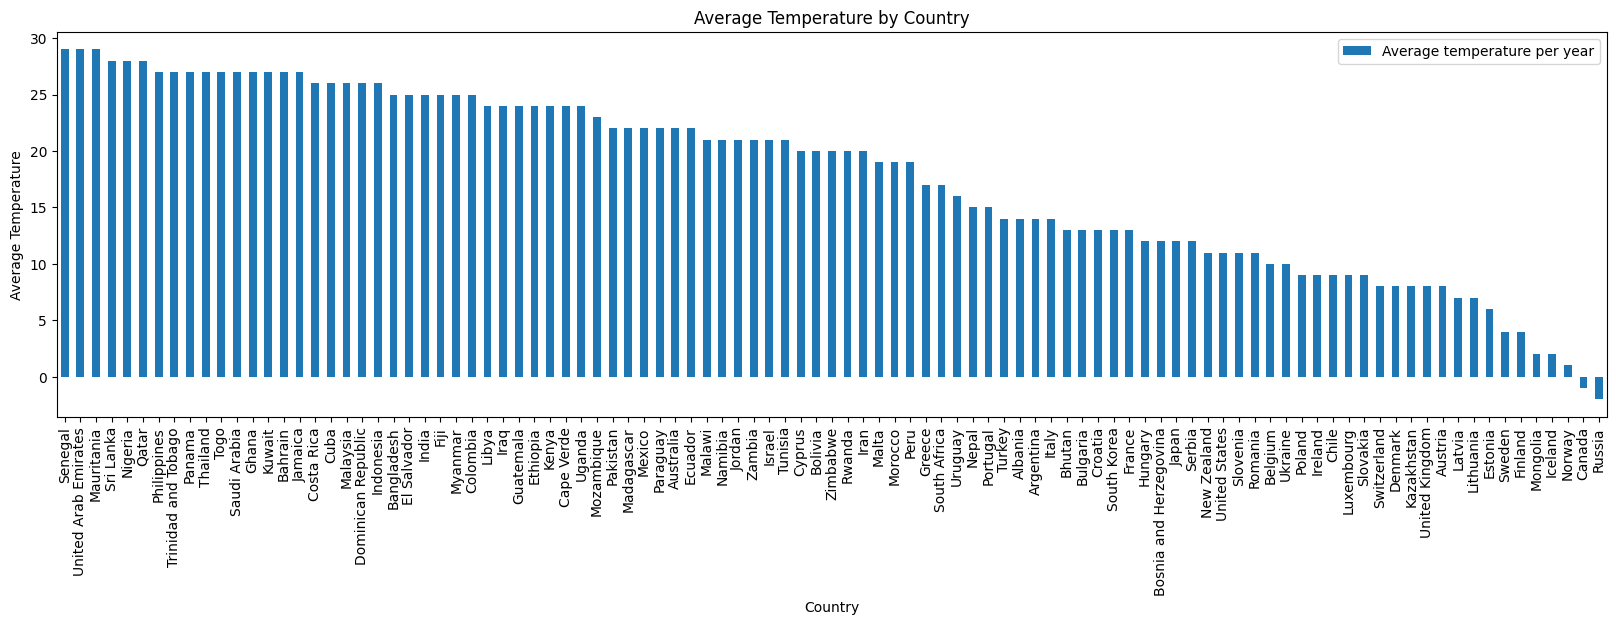

In [9]:
df1 = df.copy()
# keep only entity and temperature columns
df1 = df1[['Entity', 'Average temperature per year']]
# group by entity and take the mean
df1 = df1.groupby('Entity').mean()

# sort by temperature
df1 = df1.sort_values(by='Average temperature per year', ascending=False)

df1.plot(kind='bar', figsize=(20, 5))
plt.title('Average Temperature by Country')
plt.xlabel('Country')
plt.ylabel('Average Temperature')
plt.show()


Graph Hospital beds per 1000 people of each country by deaths

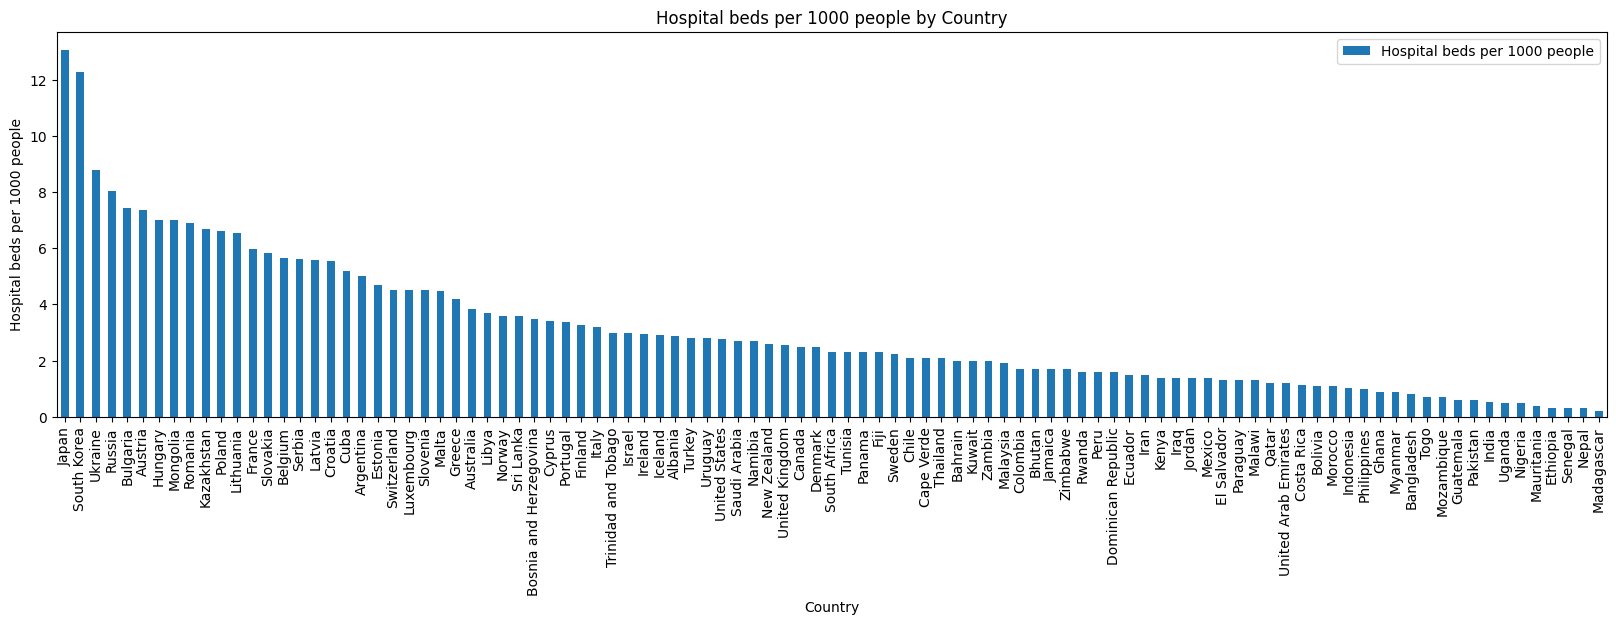

In [10]:
df2 = df.copy()
# keep only entity and Hospital beds per 1000 people columns
df2 = df2[['Entity', 'Hospital beds per 1000 people']]
# group by entity and take the mean
df2 = df2.groupby('Entity').mean()

# sort by Hospital beds per 1000 people
df2 = df2.sort_values(by='Hospital beds per 1000 people', ascending=False)

df2.plot(kind='bar', figsize=(20, 5))
plt.title('Hospital beds per 1000 people by Country')
plt.xlabel('Country')
plt.ylabel('Hospital beds per 1000 people')
plt.show()


Graph Medical doctors per 1000 people of each country by deaths

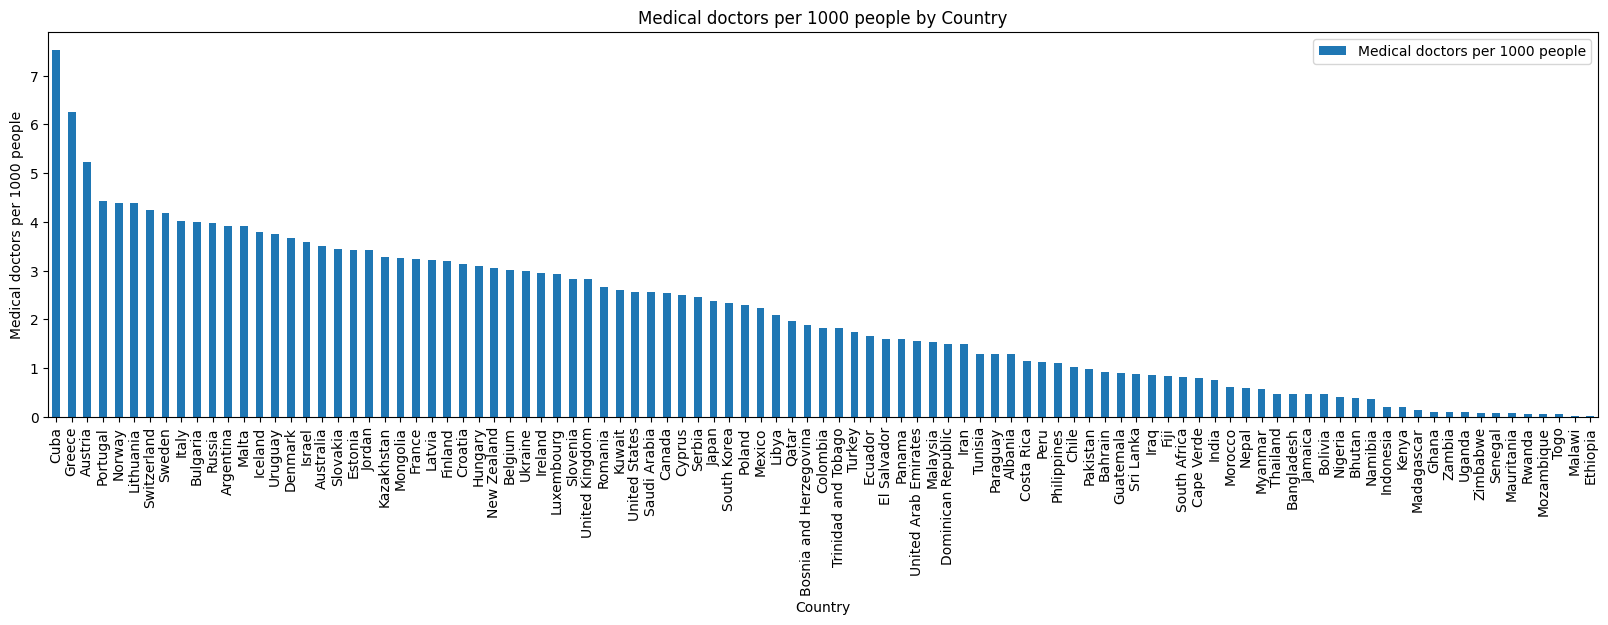

In [11]:
df3 = df.copy()
# keep only entity and Medical doctors per 1000 people columns
df3 = df3[['Entity', 'Medical doctors per 1000 people']]
# group by entity and take the mean
df3 = df3.groupby('Entity').mean()

# sort by Medical doctors per 1000 people
df3 = df3.sort_values(by='Medical doctors per 1000 people', ascending=False)

df3.plot(kind='bar', figsize=(20, 5))
plt.title('Medical doctors per 1000 people by Country')
plt.xlabel('Country')
plt.ylabel('Medical doctors per 1000 people')
plt.show()

Graph Population aged 65 and over of each country by deaths

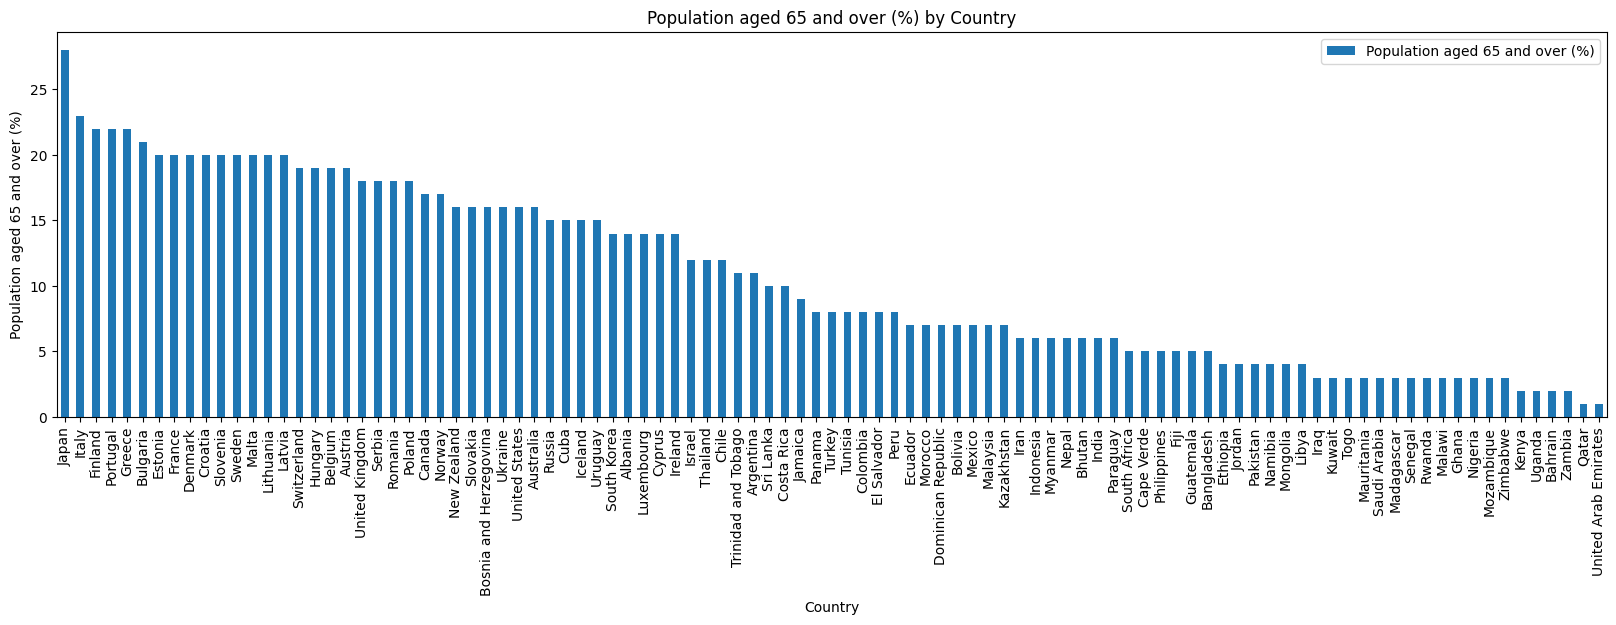

In [12]:
df4 = df.copy()
# keep only entity and Population density columns
df4 = df4[['Entity', 'Population aged 65 and over (%)']]
# group by entity and take the mean
df4 = df4.groupby('Entity').mean()

# sort by Population density
df4 = df4.sort_values(by='Population aged 65 and over (%)', ascending=False)

df4.plot(kind='bar', figsize=(20, 5))
plt.title('Population aged 65 and over (%) by Country')
plt.xlabel('Country')
plt.ylabel('Population aged 65 and over (%)')
plt.show()